# Preprocessing Pipeline visualized

## Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
from preprocessing.face_detection import FaceDetectorMP
from preprocessing.landmark_detection import LandmarkDetectorMP

## Face Detection Step

Este módulo utiliza la tarea de detección de rostros de MediaPipe Tasks para detectar un rostro en la imagen.
Si el modelo de detección encuentra un rostro, se aplica un recorte al bounding box detectado para centrar
el rostro en el resultado, que será utilizado como entrada para la extracción de landmarks faciales.

[INFO] Initializing MediaPipe FaceDetector with model: models/mediapipe/blaze_face_short_range.tflite
[INFO] Running mode set to: VisionTaskRunningMode.IMAGE
[INFO] MediaPipe FaceDetector initialized successfully.



Dimensiones Originales (360, 519, 3) | Dimensiones resultantes (153, 153, 3)


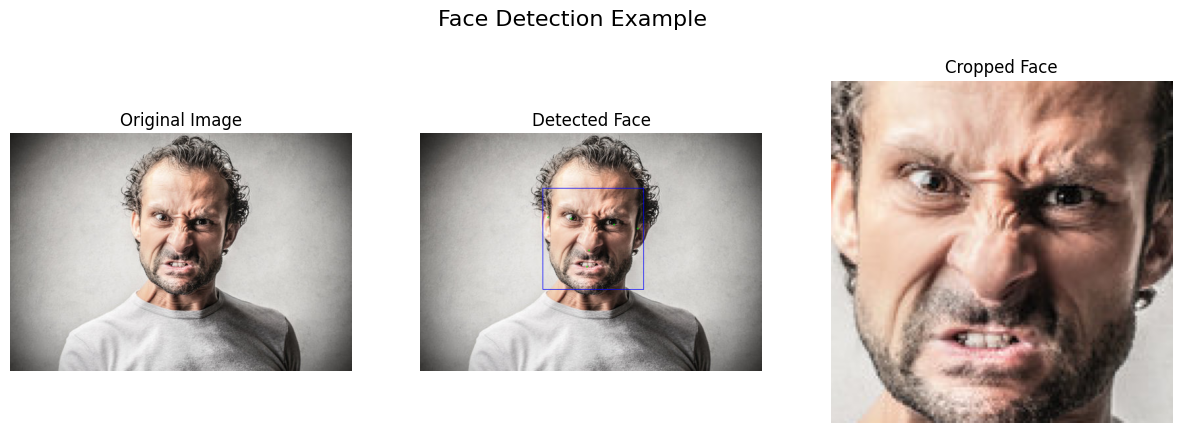

In [2]:
# Read an image from the FER2013+ dataset
image = cv2.imread("../data/examples/angry_example.png")

# Initialize the face detection module
FaceDetectorMP = FaceDetectorMP(mode="image", enable_resizing=False, enable_logging=False)

# Get the detection result using the face detection module
detection_result = FaceDetectorMP.detect_faces(image)

# If a face is detected, crop and visualize the results
if detection_result is not None:
    # Crop the face from the image
    face_crop = FaceDetectorMP.crop_face(image, detection_result)
    # Annote the image with the detected face
    annoted = FaceDetectorMP.annotate_face_detections(image, detection_result)

    # Display the original image with the detected face and the cropped face
    plt.figure(figsize=(15, 5))
    plt.suptitle("Face Detection Example", fontsize=16)
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(annoted, cv2.COLOR_BGR2RGB))
    plt.title("Detected Face")
    plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Face")
    plt.axis("off")

    print (f"\nDimensiones Originales {image.shape} | Dimensiones resultantes {face_crop.shape}")

## Face Landmarks detection step

Este módulo utiliza la tarea de detección de puntos de referencia de rostros de MediaPipe Tasks para detectar una red de puntos clave de un rostro, luego aplana los 478 puntos a un vector 1D para alimentar al modelo posteriormente.

[INFO] Initializing MediaPipe FaceLandmarker with model: models/mediapipe/face_landmarker.task
[INFO] Running mode set to: VisionTaskRunningMode.IMAGE
[INFO] MediaPipe FaceLandmarker initialized successfully.



Puntos de referencia detectados: 478
Dimension del vector resultante: 1434


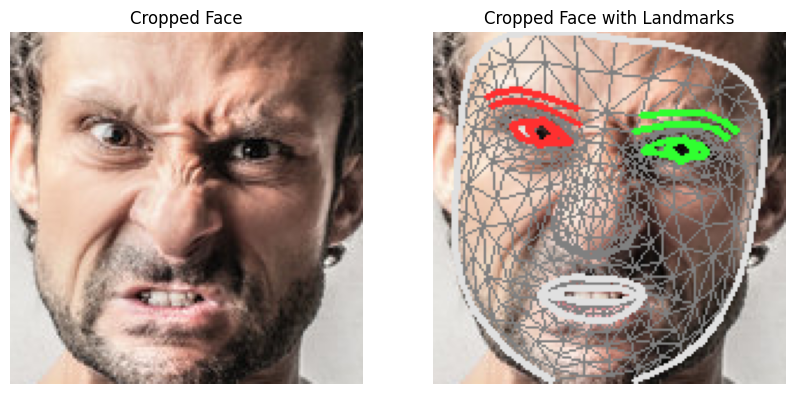

In [3]:
# Initialize the face landmark detection module
LandmarkDetectorMP = LandmarkDetectorMP(mode="image", enable_logging=False)

# Get the landmark detection result using the landmark detection module
landmark_result = LandmarkDetectorMP.detect_landmarks(face_crop)

# If landmarks are detected, visualize the results
if landmark_result is not None:
    # Annotate the cropped face with landmarks
    annotated_face = LandmarkDetectorMP.annotate_face_landmarks(face_crop, landmark_result)
    print(f"\nPuntos de referencia detectados: {len(landmark_result.face_landmarks[0])}")
    # Extract the landmarks for further processing
    landmarks = LandmarkDetectorMP.extract_landmark_vector(landmark_result)

    print(f"Dimension del vector resultante: {landmarks.shape[0]}")

    # Display the cropped face with landmarks
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Face")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(annotated_face, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Face with Landmarks")
    plt.axis("off")
    plt.show()